# 0. Before we start...

In [1]:
# Importing libraries and reading the data file
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
cwd = os.getcwd()
if cwd != '/Users/yujijeong/Desktop/Hopper':
    os.chdir('/Users/yujijeong/Desktop/Hopper')

In [7]:
data = pd.read_csv('puzzle.csv', header=None)

# 1. Exploring the data

The data has two columns and there are no null values - seems like I can jump right into exploratory analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1024 non-null   float64
 1   1       1024 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


I first try plotting the first column as x and the second column as y. There seems to be 2 to 3 horizontally long clusters of data. Datapoints seem aggregated towards the right bottom of the plot.

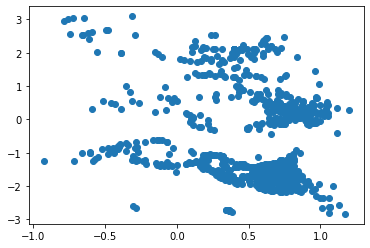

In [9]:
plt.scatter(x=data.loc[:,0],y=data.loc[:,1])

Maybe the first column should be plotted as y and the second as x. Now it looks like there are 3 vertically long clusters of data. Hmmm...Is it just me or the plot looks almost like the world map? Maybe it's a map that shows the locations of airports with most visitors? (airports with over a certain number of visitors per year?)

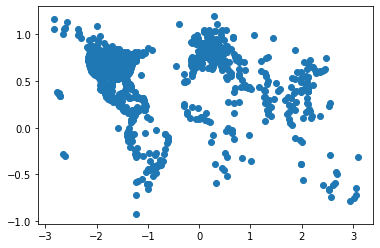

In [10]:
plt.scatter(data.loc[:,1],data.loc[:,0])

If the plot above is NOT a map, maybe there is a pattern to the distirubtion of data. I plot the histogram for each column. The first column data looks like a Gompertz law probability density function, often used in actuarial science. Most of the data in the first column ranges from 0.3 to 0.7. On the scatter plot, I can see that the datapoints in the left vertically long cluster are heavily aggregated from 0.3 to 0.7 on the y-axis. If each datapoint is indeed the location of an airport, the dataset may represent a collection of these airports
whose particular trait is heavily seen in those that are located above the equator (0 latitude).

(array([  6.,  17.,  31.,  28.,  43., 110., 238., 344., 178.,  29.]),
 array([-0.9250699 , -0.71302304, -0.50097618, -0.28892932, -0.07688246,
         0.1351644 ,  0.34721126,  0.55925812,  0.77130498,  0.98335184,
         1.1953987 ]),
 <BarContainer object of 10 artists>)

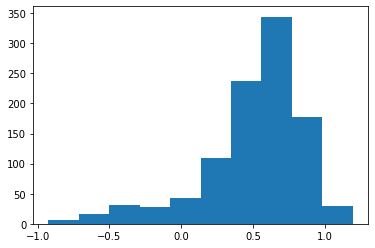

In [11]:
plt.hist(data.loc[:,0])

The histogram of the second column data doens't seeem to show us anything particular. Most of the data in the second column ranges from -2 and -1 which coincides with the heavily aggregated points of the left vertically long cluster on the scatter plot from -2 to -1 on the x-axis. If the map hypothesis is correct, the low distirubtion of data ranging from -2.75 to -2.25 and 2.4 to 3.2 may represent the lack of airports in the Pacific Ocean; -1 to -0.4, the Atlantic Ocean; 0.75 to 2, the Indian Ocean.

(array([ 21., 193., 319.,  39.,  86., 127.,  36.,  37., 151.,  15.]),
 array([-2.8378879 , -2.24440266, -1.65091742, -1.05743218, -0.46394694,
         0.1295383 ,  0.72302354,  1.31650878,  1.90999402,  2.50347926,
         3.0969645 ]),
 <BarContainer object of 10 artists>)

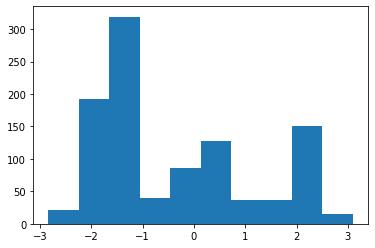

In [12]:
plt.hist(data.loc[:,1])

It's interesting that the range of data for both columns centers at 0 (the first column data ranges closely from -1 to 1 and the second column data ranges closely from -3 to 3). Furthermore, the coordinate [0, 0] on the scatter plot seems to be located where Gulf of Guinea (West Africa) would be. Could it be that the two columns are latitude and longitude of a map?

In [13]:
data.describe()

,0,1
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


**MY HYPOTHESIS: The plot shows the international airports around the world with a certain trait - perhaps, most visited or are in urban/tourist areas.**

To check my hypothesis, I will
* Re-scale the scatter plot so that real coordinates can be compared to
* Qualitatively and quantitatively compare coordinates of airport locations around the world to see how closely they match with the datapoints on the plot

I also want to explain the scarcity of datapoints in African and Russian regions, which are not as aggregated as American or European regions.

# 2. Preparing the data

In [15]:
# Let's rename the columns
data = data.rename(columns={0: "latitude", 1: 'longitude'})

I'm going to choose a datapoint on the plot located around [-1.3, -0.9] (datapoint with the smallest y value) and guess where that would be on a real map. (I chose this point specifically since it was separated from clusters of data which may make guessing of its location on the world map easier). It seems to be somewhere in Argentia in South America. Exploring on Google Maps, it seems to be the location of the Ushuaia Airport in Argentina.

Ushuaia Airport has the coordinates [-68.2907, -54.8393]. Assuming that this southmost point is indeed the location of Ushuaia Airport, I'm going to scale the scatter plot based on this coordinate.

On the scatter plot, the southmost data point has the coordinates:
x "longitude" is -1.236646 and y "latitude" is -0.92507

In [17]:
data.loc[data.loc[:,'latitude']==min(data.loc[:,'latitude'])]

,latitude,longitude
970,-0.92507,-1.236646


Scaling the scatter plot based on this "pivot point", I find the "ratio" between [-1.2366, -0.9251] and [-68.2907, -54.8393] which is 55.22251 to 59.28124. So I muliply the column 'longitude' by 55.22251 and the column 'latitude' by 59.28124.

In [18]:
long = data.loc[:,['longitude']].mul(55.22251)
lat = data.loc[:,['latitude']].mul(59.28124)

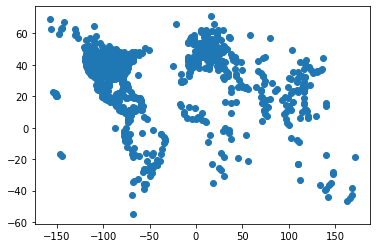

In [19]:
plt.scatter(long, lat)
plt.savefig('scaled_map') # saving the image for quantitative test later on

The plot is slightly more stretched vertically but the location of datapoints, relative to one another, seems to be (almost) the same as before it was scaled.

# 3. Plotting more and comparing qualitatively

I found a dataset online on airports (IATA codes) and their coordinates, on https://data.world/wfp/26d2ee92-d197-4e54-8de0-1764c19354ad. It should be noted that this dataset doesn't contain every airport in the world (for example, there is no information on LAX airport). The format of the data is geojson, so I'm importing anothere library to be able to read the data.

I'm going to superimpose the coordinates of international airports on the plot. If the plot is indeed a map, then I should see the superimposed coordiantes (orange) right on top of the exisiting datapoints (blue).

In [20]:
import geopandas
airports = geopandas.read_file(open('global-airports.geojson'))

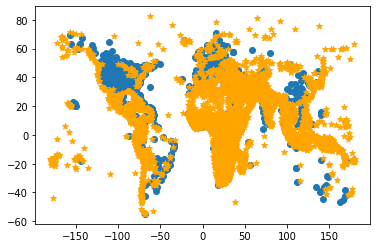

In [21]:
fig, ax = plt.subplots()
ax.scatter(long, lat)
ax.scatter(airports.longitude, airports.latitude, color='orange', marker='*')
plt.show()

As expected, the coordinate of the Ushuaia Airport is superimposed perfectly on top of the blue point
as it was used to scale this map.
For the rest of the coordinates, they seem to match fairly well with the blue datapoints.
From this observation, I'm fairly confident that the dataset represents the locations of airports.

Unlike the blue datapoints, the orange datapoints show a lot of airports in Africa - even in the desserts! As expected, I will have to filter the 'airports' data to make less number of orange datapoints visible so that it looks like the blue datapoints.

In [23]:
# The feature 'apttype' tells us which type of structure the airport it is.
airports.apttype.unique()

array(['Airstrip', 'Airport', 'Airfield', 'Helipad', 'Unknown', None],
      dtype=object)

In [24]:
# The feature 'aptclass' tells us whether it flies internationally or domestically.
airports.aptclass.unique()

array(['Unspecified', 'International', 'Domestic', 'Unknown', None,
       'Helipad', ''], dtype=object)

In [25]:
# The feature 'status' tells us whether the airport is operating normally or is being built or is restricted.
airports.status.unique()

array(['Open', 'Unknown', 'Restricted', 'Closed', 'Planned', '', None],
      dtype=object)

In [26]:
# The feature 'authority' tells us whether the airport is used for the general public, military or for private cizitens.
airports.authority.unique()

array([' ', 'Civil/Military', 'Civil', 'Military', 'Private', 'Unknown',
       'Civil Public', None, 'International'], dtype=object)

I will try a few different filterings and compare their plots:

For the first filtering, 'apttype' is 'Airport' or 'Unknown'; 'aptclass' is 'International' or 'Unknown'; 'authority' is 'Civil', 'Civil Public' or 'Private'; 'status' is 'Open' or 'Unknown'

In [28]:
temp = airports.loc[:,['nameshort','apttype','aptclass','authority','status','latitude','longitude']].dropna()
temp2 = temp[temp.aptclass.str.contains('International|Unknown', case=False)].index
temp3 = temp[temp.apttype.str.contains('Airport|Unknown', case=False)].index
temp4 = temp[temp.status=='Open'].index
temp5 = temp[temp.authority.str.contains('Civil|Unknown', case=False)].index

filtered_airports1 = temp.loc[temp2.intersection(temp3).intersection(temp4).intersection(temp5)]

For the second filtering, it's the same filtering as above except apttype is 'Airport' and 'Airport' only

In [29]:
temp6 = temp[temp.apttype=='Airport'].index
filtered_airports2 = temp.loc[temp2.intersection(temp6).intersection(temp4).intersection(temp5)]

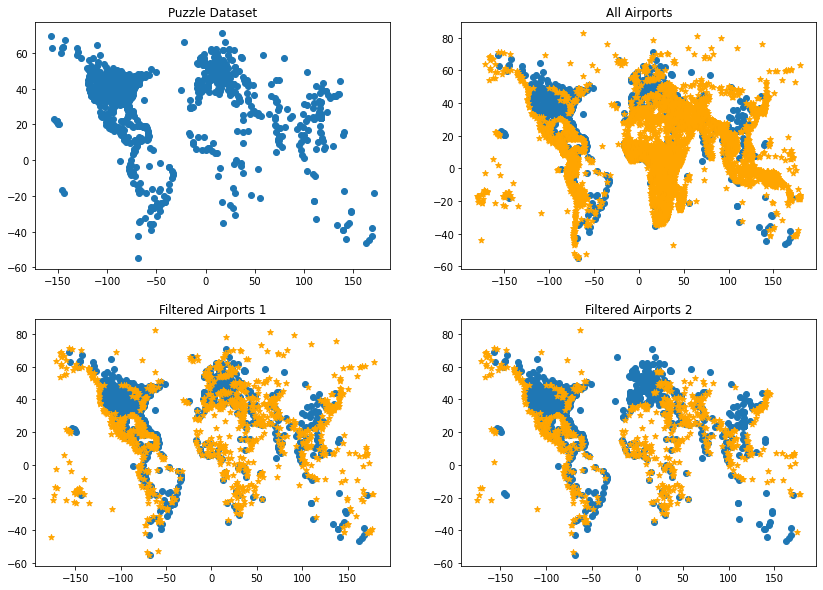

In [30]:
# Plotting the two filtered data
fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].scatter(long, lat)
ax[0,0].set_title("Puzzle Dataset")
ax[0,1].scatter(long, lat)
ax[0,1].scatter(airports.longitude, airports.latitude, color='orange', marker='*')
ax[0,1].set_title("All Airports")
ax[1,0].scatter(long, lat)
ax[1,0].scatter(filtered_airports1.longitude, filtered_airports1.latitude, color='orange', marker='*')
ax[1,0].set_title("Filtered Airports 1")
ax[1,1].scatter(long, lat)
ax[1,1].scatter(filtered_airports2.longitude, filtered_airports2.latitude, color='orange', marker='*')
ax[1,1].set_title("Filtered Airports 2")
plt.show()

The orange datapoints are closely plotted with the blue datapoints. I can see the similar scarcity of datapoints in the African region as well as the South American region. However, in the North American region, the orange datapoints are not plotted like the blue ones - it's much more scarce. Additionally, there are regions where orange datapoints are plotted but the blue datapoints are not - for example, in the South Pacific Ocean (left to South America) and in Russia. This may indicate that there is another trait that are common to all the blue datapoints, or that the 'airports' data does not contain information on all the airports around the world.

# 4. Comparing quantitatively with image analysis

Now, I try comparing quantitatively by comparing the images of the plot:

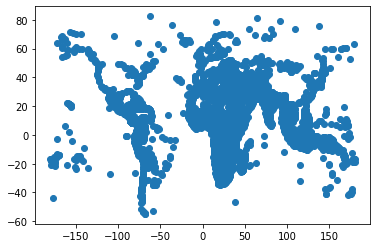

In [33]:
# Saving the image of all datapoints of 'airports'
plt.scatter(airports.longitude, airports.latitude)
plt.savefig('all_airports')

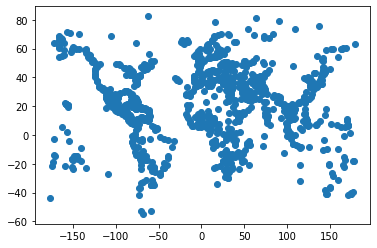

In [34]:
# Saving the image of first filtered datapoints of 'airports'
plt.scatter(filtered_airports1.longitude, filtered_airports1.latitude)
plt.savefig('filtered_airports1')

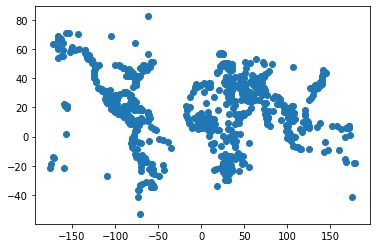

In [35]:
# Saving the image of second filtered datapoints of 'airports'
plt.scatter(filtered_airports2.longitude, filtered_airports2.latitude)
plt.savefig('filtered_airports2')

In [36]:
# Importing libraries to compare the images of the plots of filtered 'airports' data
from skimage.metrics import structural_similarity as ssim
import cv2

In [37]:
# The image of the Puzzle Data plot
file1 = cv2.imread('scaled_map.png')
# The image of the plot with all datatpoints of 'airports' data
file2 = cv2.imread('all_airports.png')
# The images of filtered data
file3 = cv2.imread('filtered_airports1.png')
file4 = cv2.imread('filtered_airports2.png')

In [38]:
# Converting the images to grayscale
gray1 = cv2.cvtColor(file1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(file2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(file3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(file4, cv2.COLOR_BGR2GRAY)

In [39]:
# Preparing the "scores" of each image
(score1, diff1) = ssim(gray1, gray2, full=True)
(score2, diff2) = ssim(gray1, gray3, full=True)
(score3, diff3) = ssim(gray1, gray4, full=True)

The score represents the structural similarity index between two images. It ranges from -1 to 1 where either -1 or 1 indicate a perfect image match. The image of the second filtered data, with the score of 0.702, shows the best match with the Puzzle Data plot. 

In [40]:
print([round(score, 4) for score in [score1, score2, score3]])

[0.6614, 0.6752, 0.702]


# 5. Conclusion

The two plots of the filtered 'airports' data are similar to the Puzzle Data plot. Depending on the way data is filtered, the resulting plot looked significantly different. From my exploratory analysis, I am fairly confident that the Puzzle Data represents the locations of the most visited international airports around the world.

It would be interesting to plot the top 1000 (same as the number of blue datapoints in the Puzzle Data) most visited airports to make a better comparison. If the blue datapoints represent the most visited international airports, then the 1000 orange datapoints would be precisely superimposed on the blue datapoints. Unfortunately, I could only find the dataset with the top 50 visited airports (see top50_airports.ipynb).

My other hypothesis is that the Puzzle Data represents the most frequent arrival locations for travellers from the American region, since the American region is the most densenly plotted region in the map and it is highly likely that American travellers travel more domestically than internationally. More precisely, the Puzzle Data may represent the most frequent arrival locations for the Hopper app users who are mostly from the American region where the app is heavily marketed.